In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
drive_root = '/gdrive/My\ Drive/'

Mounted at /gdrive


In [ ]:
!apt-get install openslide-tools
!pip install openslide-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 92.5 kB of archives.
After this operation, 268 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopenslide0 amd64 3.4.1+dfsg-2 [79.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 openslide-tools amd64 3.4.1+dfsg-2 [12.7 kB]
Fetched 92.5 kB in 0s (1,043 kB/s)
Selecting previously unselected package libopenslide0.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../libopenslide0_3.4.1+dfsg

In [ ]:
%cd $drive_root
%cd slides

/gdrive/My Drive
/gdrive/.shortcut-targets-by-id/1chjo281ARdtcVo_ecgw-_2S1txf761k8/slides


In [ ]:
!ls

tumor_001_mask.tif  tumor_019.xml	tumor_059.xml	    tumor_091.tif
tumor_001.tif	    tumor_023_mask.tif	tumor_064_mask.tif  tumor_091.xml
tumor_001.xml	    tumor_023.tif	tumor_064.tif	    tumor_094_mask.tif
tumor_002_mask.tif  tumor_023.xml	tumor_064.xml	    tumor_094.tif
tumor_002.tif	    tumor_031_mask.tif	tumor_075_mask.tif  tumor_094.xml
tumor_002.xml	    tumor_031.tif	tumor_075.tif	    tumor_096_mask.tif
tumor_005_mask.tif  tumor_031.xml	tumor_075.xml	    tumor_096.tif
tumor_005.tif	    tumor_035_mask.tif	tumor_078_mask.tif  tumor_096.xml
tumor_005.xml	    tumor_035.tif	tumor_078.tif	    tumor_101_mask.tif
tumor_012_mask.tif  tumor_035.xml	tumor_078.xml	    tumor_101.tif
tumor_012.tif	    tumor_038.tif	tumor_081_mask.tif  tumor_101.xml
tumor_012.xml	    tumor_038.xml	tumor_081.tif	    tumor_110_mask.tif
tumor_016_mask.tif  tumor_057_mask.tif	tumor_081.xml	    tumor_110.tif
tumor_016.tif	    tumor_057.tif	tumor_084_mask.tif  tumor_110.xml
tumor_016.xml	    tumor_057.xml	tumor_084.ti

# run script below to generate new patches from one slide

### positive slides: 001, 016, 031, 064, 075, 078, 084, 091, 094, 096, 101
### negative slides: 002, 012

In [ ]:
# MODIFY THIS
slide_path = 'tumor_012.tif'
tumor_path = 'tumor_012_mask.tif'

In [ ]:
from openslide import open_slide
slide = open_slide(slide_path)

In [ ]:
tumor = open_slide(tumor_path)

In [ ]:
print(f"Slide includes {len(slide.level_dimensions)} levels")
print(f"Tumor includes {len(tumor.level_dimensions)} levels")

Slide includes 10 levels
Tumor includes 9 levels


In [ ]:
for i in range(len(slide.level_dimensions)):
    print("Level %d, dimensions: %s downsample factor %d" % (i, 
                                                             slide.level_dimensions[i], 
                                                             slide.level_downsamples[i]))

Level 0, dimensions: (97792, 215552) downsample factor 1
Level 1, dimensions: (48896, 107776) downsample factor 2
Level 2, dimensions: (24448, 53888) downsample factor 4
Level 3, dimensions: (12224, 26944) downsample factor 8
Level 4, dimensions: (6112, 13472) downsample factor 16
Level 5, dimensions: (3056, 6736) downsample factor 32
Level 6, dimensions: (1528, 3368) downsample factor 64
Level 7, dimensions: (764, 1684) downsample factor 128
Level 8, dimensions: (382, 842) downsample factor 256
Level 9, dimensions: (191, 421) downsample factor 512


In [ ]:
for i in range(len(tumor.level_dimensions)):
    print("Level %d, dimensions: %s downsample factor %d" % (i, 
                                                             tumor.level_dimensions[i], 
                                                             tumor.level_downsamples[i]))

Level 0, dimensions: (97792, 215552) downsample factor 1
Level 1, dimensions: (48896, 107776) downsample factor 2
Level 2, dimensions: (24448, 53888) downsample factor 4
Level 3, dimensions: (12224, 26944) downsample factor 8
Level 4, dimensions: (6112, 13472) downsample factor 16
Level 5, dimensions: (3056, 6736) downsample factor 32
Level 6, dimensions: (1528, 3368) downsample factor 64
Level 7, dimensions: (764, 1684) downsample factor 128
Level 8, dimensions: (382, 842) downsample factor 256


In [ ]:
levels = min(len(slide.level_dimensions), len(tumor.level_dimensions))
levels

9

### Visualization of the slide and mask

In [ ]:
def read_slide(slide, x, y, level, width, height, as_float=False):
    im = slide.read_region((x,y), level, (width, height))
    im = im.convert('RGB') # drop the alpha channel
    if as_float:
        im = np.asarray(im, dtype=np.float32)
    else:
        im = np.asarray(im)
    assert im.shape == (height, width, 3)
    return im

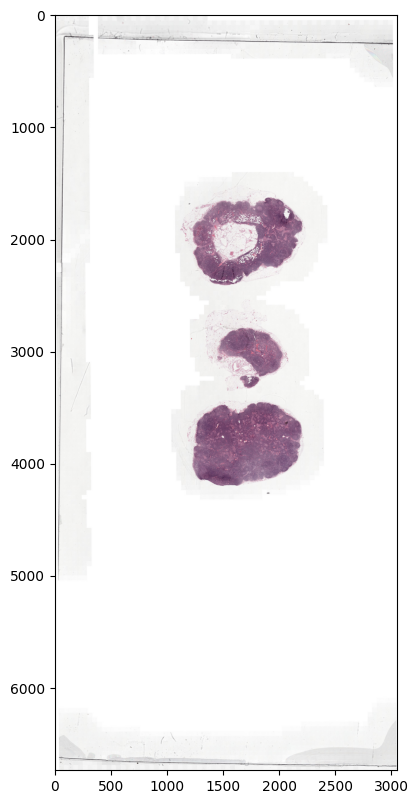

In [ ]:
slide_image = read_slide(slide, 
                         x=0, 
                         y=0, 
                         level=5, 
                         width=slide.level_dimensions[5][0], 
                         height=slide.level_dimensions[5][1])

plt.figure(figsize=(10,10), dpi=100)
plt.imshow(slide_image)

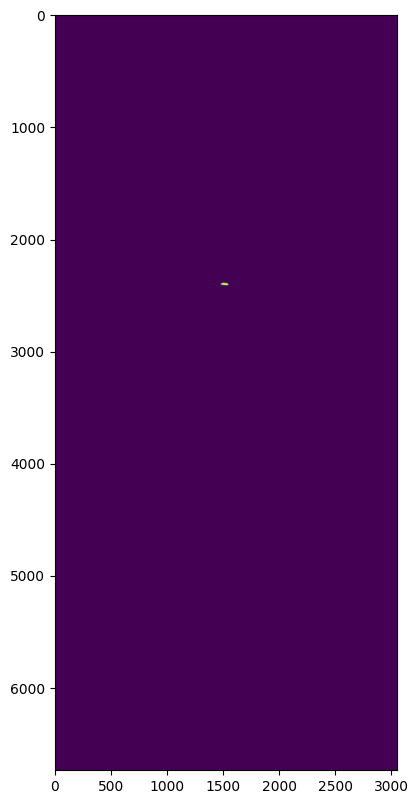

In [ ]:
tumor_image = read_slide(tumor, 
                         x=0, 
                         y=0, 
                         level=5, 
                         width=slide.level_dimensions[5][0], 
                         height=slide.level_dimensions[5][1])
tumor_image = tumor_image[:,:,0]
plt.figure(figsize=(10,10), dpi=100)
plt.imshow(tumor_image)

### Function to filter out patches that contains less than 15% tissue pixels.
### Use intensity of gray > 80% in the filter.

In [ ]:
from skimage.color import rgb2gray
import numpy as np
def find_tissue_percent(image, intensity=0.8):
    im_gray = rgb2gray(image)
    percent = np.sum(im_gray <= intensity) / (image.shape[0] * image.shape[1])
    return percent

In [ ]:
# ignore the patch if more than 15% is non-tissue
def is_valid(image):
  tissue_percent = find_tissue_percent(image)
  if tissue_percent < 0.15:
    return False
  else:
    return True

# Make directories in google drive to hold the patches for this slide.

In [ ]:
%mkdir $drive_root/patches/$slide_path
%mkdir $drive_root/patches/$slide_path/level1
%mkdir $drive_root/patches/$slide_path/level1/positive
%mkdir $drive_root/patches/$slide_path/level1/negative
%mkdir $drive_root/patches/$slide_path/level2
%mkdir $drive_root/patches/$slide_path/level2/positive
%mkdir $drive_root/patches/$slide_path/level2/negative

# Save patches of the slide for both level3 and level5.
### Slide though level3 with a stride of 299. If the center region 128x128 region contains tumor, mark it as positive, otherwise negative. For each patch in level3, find the corresponding patch in level5 that is centered at the same place.

In [ ]:
from PIL import Image
import numpy as np
level1 = 3 # more zoomed in, detail
level2 = 5  # less zoomed in, context

# sliding window on level1
# determine if tumor based on the 128*128 region on level1
width = slide.level_dimensions[level1][0]
height = slide.level_dimensions[level1][1]
cur_width = 0
cur_height = 0
pos_ind = 0
neg_ind = 0

drive_root_python = '/gdrive/My Drive'

while cur_height+299 < height:
  cur_width = 0
  while cur_width+299 < width:
    region1 = read_slide(slide, x=int(cur_width * slide.level_downsamples[level1]), y=int(cur_height * slide.level_downsamples[level1]), level=level1, width=299, height=299)
    center1_x = cur_width + 299//2
    center1_y = cur_height + 299//2
    center_ori_x = center1_x * slide.level_downsamples[level1]
    ori_x_of_2 = center_ori_x - 299//2*slide.level_downsamples[level2]
    center_ori_y = center1_y * slide.level_downsamples[level1]
    ori_y_of_2 = center_ori_y - 299//2*slide.level_downsamples[level2]
    bound2_x = ori_x_of_2 + 299 * slide.level_downsamples[level2]
    bound2_y = ori_y_of_2 + 299 * slide.level_downsamples[level2]
    if bound2_x > 0 and bound2_y > 0 and bound2_x < slide.level_dimensions[0][0] and bound2_y < slide.level_dimensions[0][1] and is_valid(region1):
      region2 = read_slide(slide, x=int(ori_x_of_2), y=int(ori_y_of_2), level=level2, width=299, height=299)
      tumor1 = read_slide(tumor, x=int(cur_width * slide.level_downsamples[level1]), y=int(cur_height * slide.level_downsamples[level1]), level=level1, width=299, height=299)
      center_tumor_region1 = tumor1[85:213, 85:213, 0]
      im1 = Image.fromarray(region1).convert('RGB')
      im2 = Image.fromarray(region2).convert('RGB')
      if np.any(center_tumor_region1 == 1):
        im1.save(f'{drive_root_python}/patches/{slide_path}/level1/positive/patch_{pos_ind}.jpeg')
        im2.save(f'{drive_root_python}/patches/{slide_path}/level2/positive/patch_{pos_ind}.jpeg')
        pos_ind += 1
      else:
        im1.save(f'{drive_root_python}/patches/{slide_path}/level1/negative/patch_{neg_ind}.jpeg')
        im2.save(f'{drive_root_python}/patches/{slide_path}/level2/negative/patch_{neg_ind}.jpeg') 
        neg_ind += 1
    cur_width += 299
  cur_height += 299

In [ ]:
print(neg_ind)
print(pos_ind)

464
249


### List the positive slides in level3.

In [ ]:
!ls $drive_root/patches/$slide_path/level1/positive

patch_0.jpeg	patch_145.jpeg	patch_190.jpeg	patch_235.jpeg	patch_56.jpeg
patch_100.jpeg	patch_146.jpeg	patch_191.jpeg	patch_236.jpeg	patch_57.jpeg
patch_101.jpeg	patch_147.jpeg	patch_192.jpeg	patch_237.jpeg	patch_58.jpeg
patch_102.jpeg	patch_148.jpeg	patch_193.jpeg	patch_238.jpeg	patch_59.jpeg
patch_103.jpeg	patch_149.jpeg	patch_194.jpeg	patch_239.jpeg	patch_5.jpeg
patch_104.jpeg	patch_14.jpeg	patch_195.jpeg	patch_23.jpeg	patch_60.jpeg
patch_105.jpeg	patch_150.jpeg	patch_196.jpeg	patch_240.jpeg	patch_61.jpeg
patch_106.jpeg	patch_151.jpeg	patch_197.jpeg	patch_241.jpeg	patch_62.jpeg
patch_107.jpeg	patch_152.jpeg	patch_198.jpeg	patch_242.jpeg	patch_63.jpeg
patch_108.jpeg	patch_153.jpeg	patch_199.jpeg	patch_243.jpeg	patch_64.jpeg
patch_109.jpeg	patch_154.jpeg	patch_19.jpeg	patch_244.jpeg	patch_65.jpeg
patch_10.jpeg	patch_155.jpeg	patch_1.jpeg	patch_245.jpeg	patch_66.jpeg
patch_110.jpeg	patch_156.jpeg	patch_200.jpeg	patch_246.jpeg	patch_67.jpeg
patch_111.jpeg	patch_157.jpeg	patch_201.jpeg	pa

### Show an example of a patch from level3 and a patch from level5 that are centered at the same place.

#### Level3

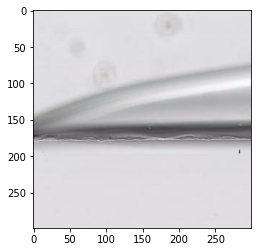

In [ ]:
import tensorflow as tf
img = tf.io.read_file(f"{drive_root_python}/patches/{slide_path}/level1/negative/patch_0.jpeg")
img = tf.image.decode_jpeg(img, channels=3)
plt.imshow(img)

#### Level5

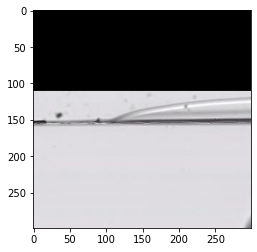

In [ ]:
img = tf.io.read_file(f"{drive_root_python}/patches/{slide_path}/level2/negative/patch_0.jpeg")
img = tf.image.decode_jpeg(img, channels=3)
plt.imshow(img)